/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.65      0.92      0.76        12

    accuracy                           0.65        20
   macro avg       0.66      0.58      0.56        20
weighted avg       0.65      0.65      0.60        20



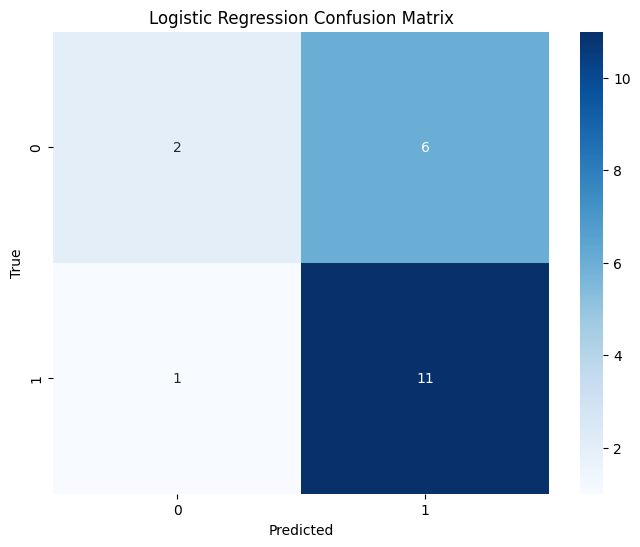

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.67      1.00      0.80        12

    accuracy                           0.70        20
   macro avg       0.83      0.62      0.60        20
weighted avg       0.80      0.70      0.64        20



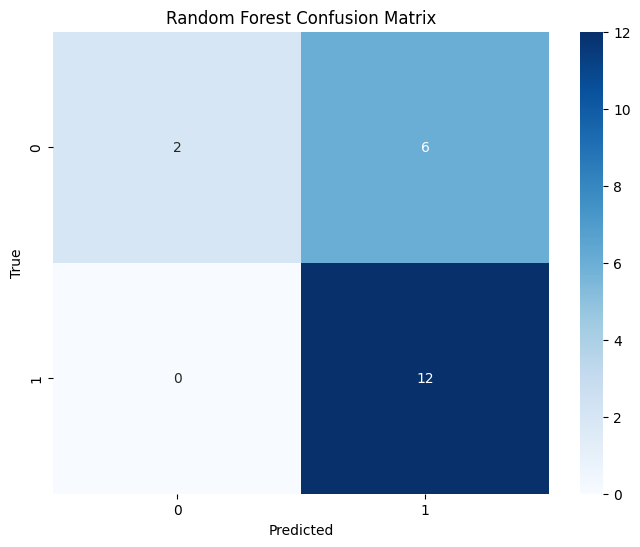

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.60      1.00      0.75        12

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


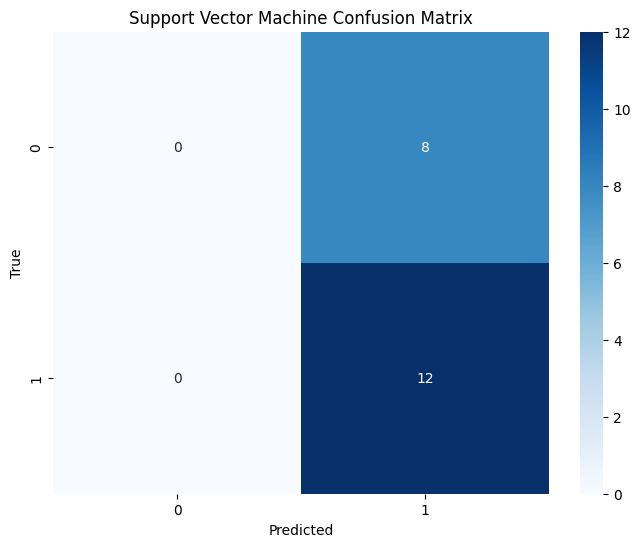

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.63      1.00      0.77        12

    accuracy                           0.65        20
   macro avg       0.82      0.56      0.50        20
weighted avg       0.78      0.65      0.55        20



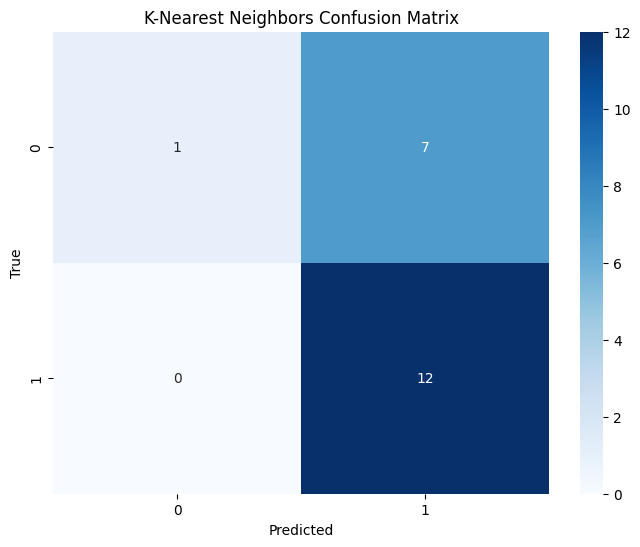

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.75      1.00      0.86        12

    accuracy                           0.80        20
   macro avg       0.88      0.75      0.76        20
weighted avg       0.85      0.80      0.78        20



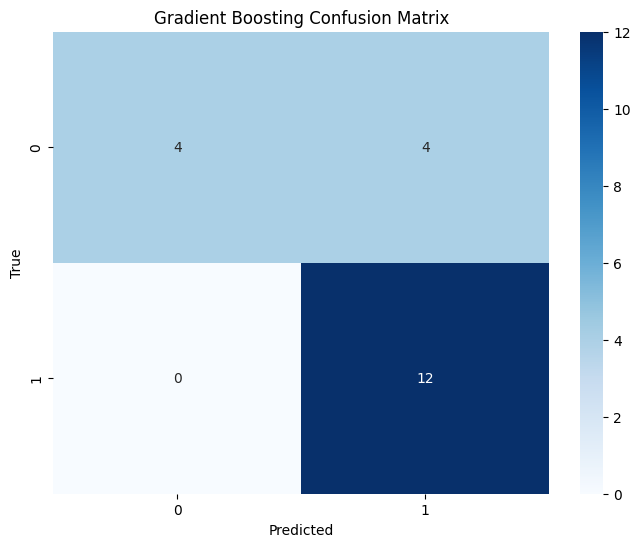

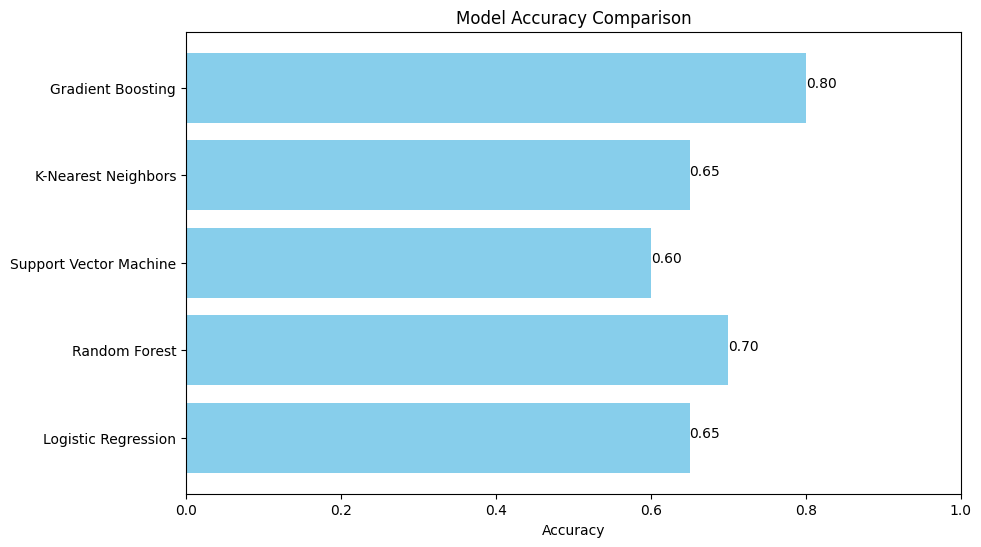

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Simulate GIS Data
gis_data = pd.DataFrame({
    'Building_ID': range(1, 101),
    'Building_Footprint': np.random.uniform(50, 200, 100),  # in square meters
    'Building_Height': np.random.uniform(5, 50, 100),  # in meters
    'Roof_Type': np.random.choice(['Flat', 'Gabled', 'Hipped'], 100)
})

# Simulate Drone Data
drone_data = pd.DataFrame({
    'Building_ID': range(1, 101),
    'Solar_Potential': np.random.uniform(100, 500, 100),  # kWh/year
    'Shape_Complexity': np.random.randint(1, 10, 100)  # Arbitrary complexity score
})

# Simulate Historical Energy Data
historical_data = pd.DataFrame({
    'Building_ID': range(1, 101),
    'Annual_Energy_Consumption': np.random.uniform(5000, 15000, 100),  # kWh/year
    'Peak_Demand': np.random.uniform(1, 5, 100)  # kW
})

# Merge datasets based on Building_ID
data = pd.merge(gis_data, drone_data, on='Building_ID')
data = pd.merge(data, historical_data, on='Building_ID')

# Feature engineering
data['Footprint_Height_Ratio'] = data['Building_Footprint'] / data['Building_Height']
data['Energy_Intensity'] = data['Annual_Energy_Consumption'] / data['Building_Footprint']

# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['Roof_Type'], drop_first=True)

# Features and target
X = data.drop(columns=['Building_ID', 'Annual_Energy_Consumption'])
y = pd.cut(data['Annual_Energy_Consumption'], bins=[0, 7500, 15000], labels=[0, 1])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train models and calculate accuracy
model_accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy

    # Print the classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plotting the accuracy comparison chart
plt.figure(figsize=(10, 6))
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
for index, value in enumerate(list(model_accuracies.values())):
    plt.text(value, index, f"{value:.2f}")
plt.show()
